<a href="https://colab.research.google.com/github/Jorge2018/prediccion_ventas/blob/main/proyecto01_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier 
df=pd.read_csv(r'https://raw.githubusercontent.com/Jorge2018/RepositorioArchivos/main/sales_prediction.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Mapa de Calor

Se puede observar una correlacion mas directa entre Item_MRP y Item_Outlet_Sales


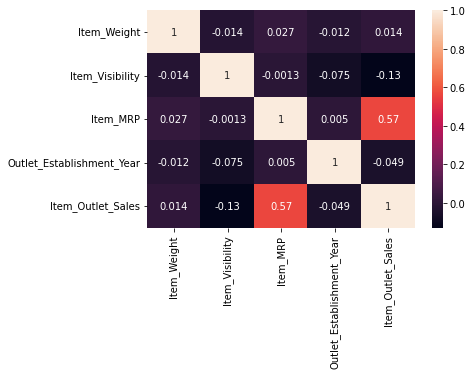

In [20]:
idx = len(df) 
cols = df.columns
corr = df.corr() 
sns.heatmap(corr, annot = True) 
print('Se puede observar una correlacion mas directa entre Item_MRP y Item_Outlet_Sales')

# Inspeccion de Datos

In [21]:
df.duplicated()
df = df.drop_duplicates()
print('la cantidad de registros sin duplicados es:\n',df.count())
print('---------------------------')
print('los datos faltantes del df son:\n',df.isna().sum())
print('---------------------------')
print('los tipos de datos son:\n')
df.info()
print('---------------------------')
df.describe().round(3)

la cantidad de registros sin duplicados es:
 Item_Identifier              8523
Item_Weight                  7060
Item_Fat_Content             8523
Item_Visibility              8523
Item_Type                    8523
Item_MRP                     8523
Outlet_Identifier            8523
Outlet_Establishment_Year    8523
Outlet_Size                  6113
Outlet_Location_Type         8523
Outlet_Type                  8523
Item_Outlet_Sales            8523
dtype: int64
---------------------------
los datos faltantes del df son:
 Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64
---------------------------
los tipos de datos son:


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000,8523.000,8523.000,8523.000,8523.000
mean,12.858,0.066,140.993,1997.832,2181.289
std,4.643,0.052,62.275,8.372,1706.500
min,4.555,0.000,31.290,1985.000,33.290
25%,8.774,0.027,93.826,1987.000,834.247
50%,12.600,0.054,143.013,1999.000,1794.331
75%,16.850,0.095,185.644,2004.000,3101.296
max,21.350,0.328,266.888,2009.000,13086.965


# Separa valores X, y

In [22]:
# Dividan
X = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Proceso para realizar transformacion en los datos

In [23]:
## **Instanciar selectores**
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

## Instanciar transformadores SimpleImputer, StandardScaler y OneHotEncoder
# Imputers
mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

## **Instanciar el pipeline**
numeric_pipe = make_pipeline(mean_imputer, scaler)
categorical_pipe = make_pipeline(freq_imputer, ohe)

## **Asignacion de tupla e instanciacion de ColumnTransformer**
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)

## **Transformacion de datos**
# fit on train
preprocessor.fit(X_train,X_test)
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Inspeccion de Resultados

In [24]:
# Comprueben los valores faltantes y que los datos se escalen y tengan una codificación one-hot
print(np.isnan(X_train_processed).sum().sum(), 'valores perdidos en la data de entrenamiento')
print(np.isnan(X_test_processed).sum().sum(), 'valores perdidos en la data de prueba')
print('\n')
print('Todos los datos procesados del X_train_processed son del tipo:', X_train_processed.dtype)
print('Todos los datos procesados del X_test_processed son del tipo', X_test_processed.dtype)
print('\n')
print('shape de los datos de entrenamiento son', X_train_processed.shape)
print('\n')


0 valores perdidos en la data de entrenamiento
0 valores perdidos en la data de prueba


Todos los datos procesados del X_train_processed son del tipo: float64
Todos los datos procesados del X_test_processed son del tipo float64


shape de los datos de entrenamiento son (6392, 1595)




In [25]:
dfinspect=pd.DataFrame(X_train_processed)
dfinspect2=pd.DataFrame(X_test_processed)
print('train\n',dfinspect)
print('test\n',dfinspect2)

train
           0         1         2         3     4     5     6     7     8     \
0     0.817249 -0.712775  1.828109  1.327849   0.0   0.0   0.0   0.0   0.0   
1     0.556340 -1.291052  0.603369  1.327849   0.0   0.0   0.0   0.0   0.0   
2    -0.131512  1.813319  0.244541  0.136187   0.0   0.0   0.0   0.0   0.0   
3    -1.169219 -1.004931 -0.952591  0.732018   0.0   0.0   0.0   0.0   0.0   
4     1.528819 -0.965484 -0.336460  0.493686   0.0   0.0   0.0   0.0   0.0   
...        ...       ...       ...       ...   ...   ...   ...   ...   ...   
6387 -0.832409  4.309657 -0.044657  0.017021   0.0   0.0   0.0   0.0   0.0   
6388  0.639356  1.008625 -1.058907  1.089517   0.0   0.0   0.0   0.0   0.0   
6389  1.113736 -0.920527  1.523027  0.493686   0.0   0.0   0.0   0.0   0.0   
6390  1.766009 -0.227755 -0.383777  1.089517   0.0   0.0   0.0   0.0   0.0   
6391  0.817249 -0.958677 -0.738361 -0.102145   0.0   0.0   0.0   0.0   0.0   

      9     ...  1585  1586  1587  1588  1589  1590  159

# Regresion Lineal

**Se instancia y entrena el modelo**

In [26]:
reg = LinearRegression()
reg.fit(X_train_processed,y_train)

LinearRegression()

**Predicciones**

In [32]:
# Obtengan las predicciones del conjunto de entrenamiento
train_preds = reg.predict(X_train_processed)
# Obtengan las predicciones del conjunto de prueba
test_preds = reg.predict(X_test_processed)

In [33]:
train_score = reg.score(X_train_processed, y_train)
print('Prediccion del R2 cuadrado sobre los datos de Entrenamiento',train_score)
train_score2 = reg.score(X_test_processed, y_test)
print('Prediccion del R2 cuadrado sobre los datos de Test',train_score2)
print('_______________________________________________________________________________')
mae_train = mean_absolute_error(y_train, train_preds)
print('el EAM utilizando los datos de entrenamiento es:',mae_train)
mae_test = mean_absolute_error(y_test, test_preds)
print('el EAM utilizando los datos de test es:',mae_test)
print('_______________________________________________________________________________')
mse_train = mean_squared_error(y_train, train_preds)
print('el ECM utilizando los datos de entrenamiento es:',mse_train)
mse_test = mean_squared_error(y_test, test_preds)
print('el ECM utilizando los datos de test es:',mse_test)
print('_______________________________________________________________________________')
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
print('el RECM utilizando los datos de entrenamiento es:',rmse_train)
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))
print('el RECM utilizando los datos de test es:',rmse_train)

Prediccion del R2 cuadrado sobre los datos de Entrenamiento 0.6315530896792858
Prediccion del R2 cuadrado sobre los datos de Test -8.656163822130806e+20
_______________________________________________________________________________
el EAM utilizando los datos de entrenamiento es: 787.6844765331664
el EAM utilizando los datos de test es: 3296404132227.8027
_______________________________________________________________________________
el ECM utilizando los datos de entrenamiento es: 1090402.310563823
el ECM utilizando los datos de test es: 2.3882159384792534e+27
_______________________________________________________________________________
el RECM utilizando los datos de entrenamiento es: 1044.223304932342
el RECM utilizando los datos de test es: 1044.223304932342


# Tree Regression

**Se inicializa el arbol con un 3 niveles**

In [28]:
arb=DecisionTreeRegressor(max_depth=3)
arb.fit(X_train_processed,y_train)

DecisionTreeRegressor(max_depth=3)

**Predicciones**

In [30]:
# Obtengan las predicciones del conjunto de entrenamiento
train_preds = arb.predict(X_train_processed)
# Obtengan las predicciones del conjunto de prueba
test_preds = arb.predict(X_test_processed)

In [31]:
train_score = arb.score(X_train_processed, y_train)
print('Prediccion del R2 cuadrado sobre los datos de Entrenamiento',train_score)
train_score2 = arb.score(X_test_processed, y_test)
print('Prediccion del R2 cuadrado sobre los datos de Test',train_score2)
print('_______________________________________________________________________________')
mae_train = mean_absolute_error(y_train, train_preds)
print('el EAM utilizando los datos de entrenamiento es:',mae_train)
mae_test = mean_absolute_error(y_test, test_preds)
print('el EAM utilizando los datos de test es:',mae_test)
print('_______________________________________________________________________________')
mse_train = mean_squared_error(y_train, train_preds)
print('el ECM utilizando los datos de entrenamiento es:',mse_train)
mse_test = mean_squared_error(y_test, test_preds)
print('el ECM utilizando los datos de test es:',mse_test)
print('_______________________________________________________________________________')
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
print('el RECM utilizando los datos de entrenamiento es:',rmse_train)
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))
print('el RECM utilizando los datos de test es:',rmse_train)

Prediccion del R2 cuadrado sobre los datos de Entrenamiento 0.5242182307911816
Prediccion del R2 cuadrado sobre los datos de Test 0.5242218617296539
_______________________________________________________________________________
el EAM utilizando los datos de entrenamiento es: 841.2430161201335
el EAM utilizando los datos de test es: 810.0469764375896
_______________________________________________________________________________
el ECM utilizando los datos de entrenamiento es: 1408055.0709947764
el ECM utilizando los datos de test es: 1312661.0775228192
_______________________________________________________________________________
el RECM utilizando los datos de entrenamiento es: 1186.6149632440913
el RECM utilizando los datos de test es: 1186.6149632440913


**Con los datos a la vista se puede concluir que el modelo mas confiable basandonos en la informacion que se entrega (mas cercana al 100 %) es el modelo del arbol de decision**